<a href="https://colab.research.google.com/github/Kamrul732/dataScience/blob/cluster/clusterassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Classroom/DataScience/WineData.csv')

In [5]:
df.head()

,Unnamed: 0,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
df = df.drop(['Color_Intensity','Hue','OD280'], axis=1)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,735


In [8]:
print(df.isnull().sum())

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Proline                 0
dtype: int64


In [9]:
print(df[df.isnull().any(axis =1)])

Empty DataFrame
Columns: [Alcohol, Malic_Acid, Ash, Ash_Alcanity, Magnesium, Total_Phenols, Flavanoids, Nonflavanoid_Phenols, Proanthocyanins, Proline]
Index: []


In [10]:
from sklearn.preprocessing import StandardScaler
X = df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [12]:
wss = []  # List to store Within-Cluster Sum of Squares (inertia)

# Test k values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wss.append(kmeans.inertia_)  # Append inertia for the current k


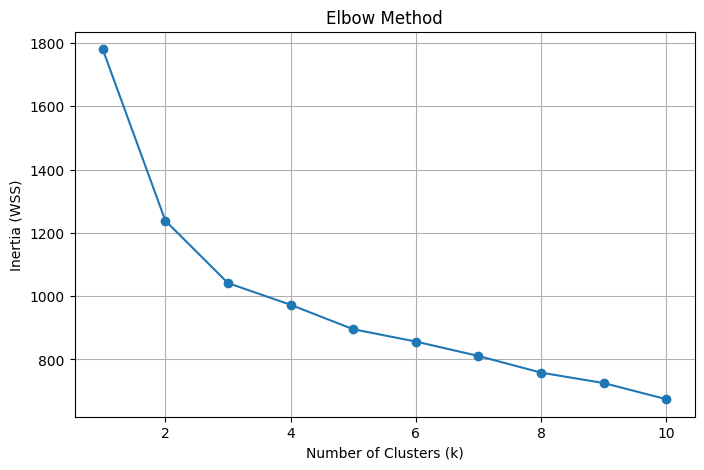

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WSS)')
plt.grid(True)
plt.show()


In [14]:
# Fit K-Means with the optimal number of clusters
optimal_k = 3  # Replace with the elbow value you found
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels and append them to your DataFrame (optional)
df['cluster'] = kmeans.labels_


In [15]:
from sklearn.cluster import KMeans

# Assuming X_scaled is your scaled dataset

# Set the optimal number of clusters (as determined by the Elbow Method)
optimal_k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Create a DataFrame to store the scaled data and assign cluster labels
df = pd.DataFrame(X_scaled, columns=[f'feature_{i+1}' for i in range(X_scaled.shape[1])])

# Add the cluster labels as a new column
df['cluster'] = cluster_labels

# Display the first few rows of the dataset with cluster labels
print(df.head())


   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   1.518613  -0.562250   0.232053  -1.169593   1.913905   0.808997   
1   0.246290  -0.499413  -0.827996  -2.490847   0.018145   0.568648   
2   0.196879   0.021231   1.109334  -0.268738   0.088358   0.808997   
3   1.691550  -0.346811   0.487926  -0.809251   0.930918   2.491446   
4   0.295700   0.227694   1.840403   0.451946   1.281985   0.808997   

   feature_7  feature_8  feature_9  feature_10  cluster  
0   1.034819  -0.659563   1.224884    1.013009        2  
1   0.733629  -0.820719  -0.544721    0.965242        2  
2   1.215533  -0.498407   2.135968    1.395148        2  
3   1.466525  -0.981875   1.032155    2.334574        2  
4   0.663351   0.226796   0.401404   -0.037874        2  


In [19]:
from sklearn.cluster import KMeans

X = df.copy()

kmeans = KMeans(n_clusters=3, random_state=0)
X['cluster'] = kmeans.fit_predict(X)

cluster_means = X.groupby('cluster').mean()


print(cluster_means)


         feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
cluster                                                                     
0        -0.962866  -0.447390  -0.881996  -0.079695  -0.535583   0.221233   
1        -0.173348   0.569319   0.198110   0.543318  -0.159394  -0.949676   
2         0.851569  -0.315112   0.389689  -0.539464   0.542551   0.886610   

         feature_7  feature_8  feature_9  feature_10  
cluster                                               
0         0.211338  -0.403178   0.293890   -0.794481  
1        -1.000508   0.749402  -0.733445   -0.477926  
2         0.949011  -0.542473   0.600156    1.068937  


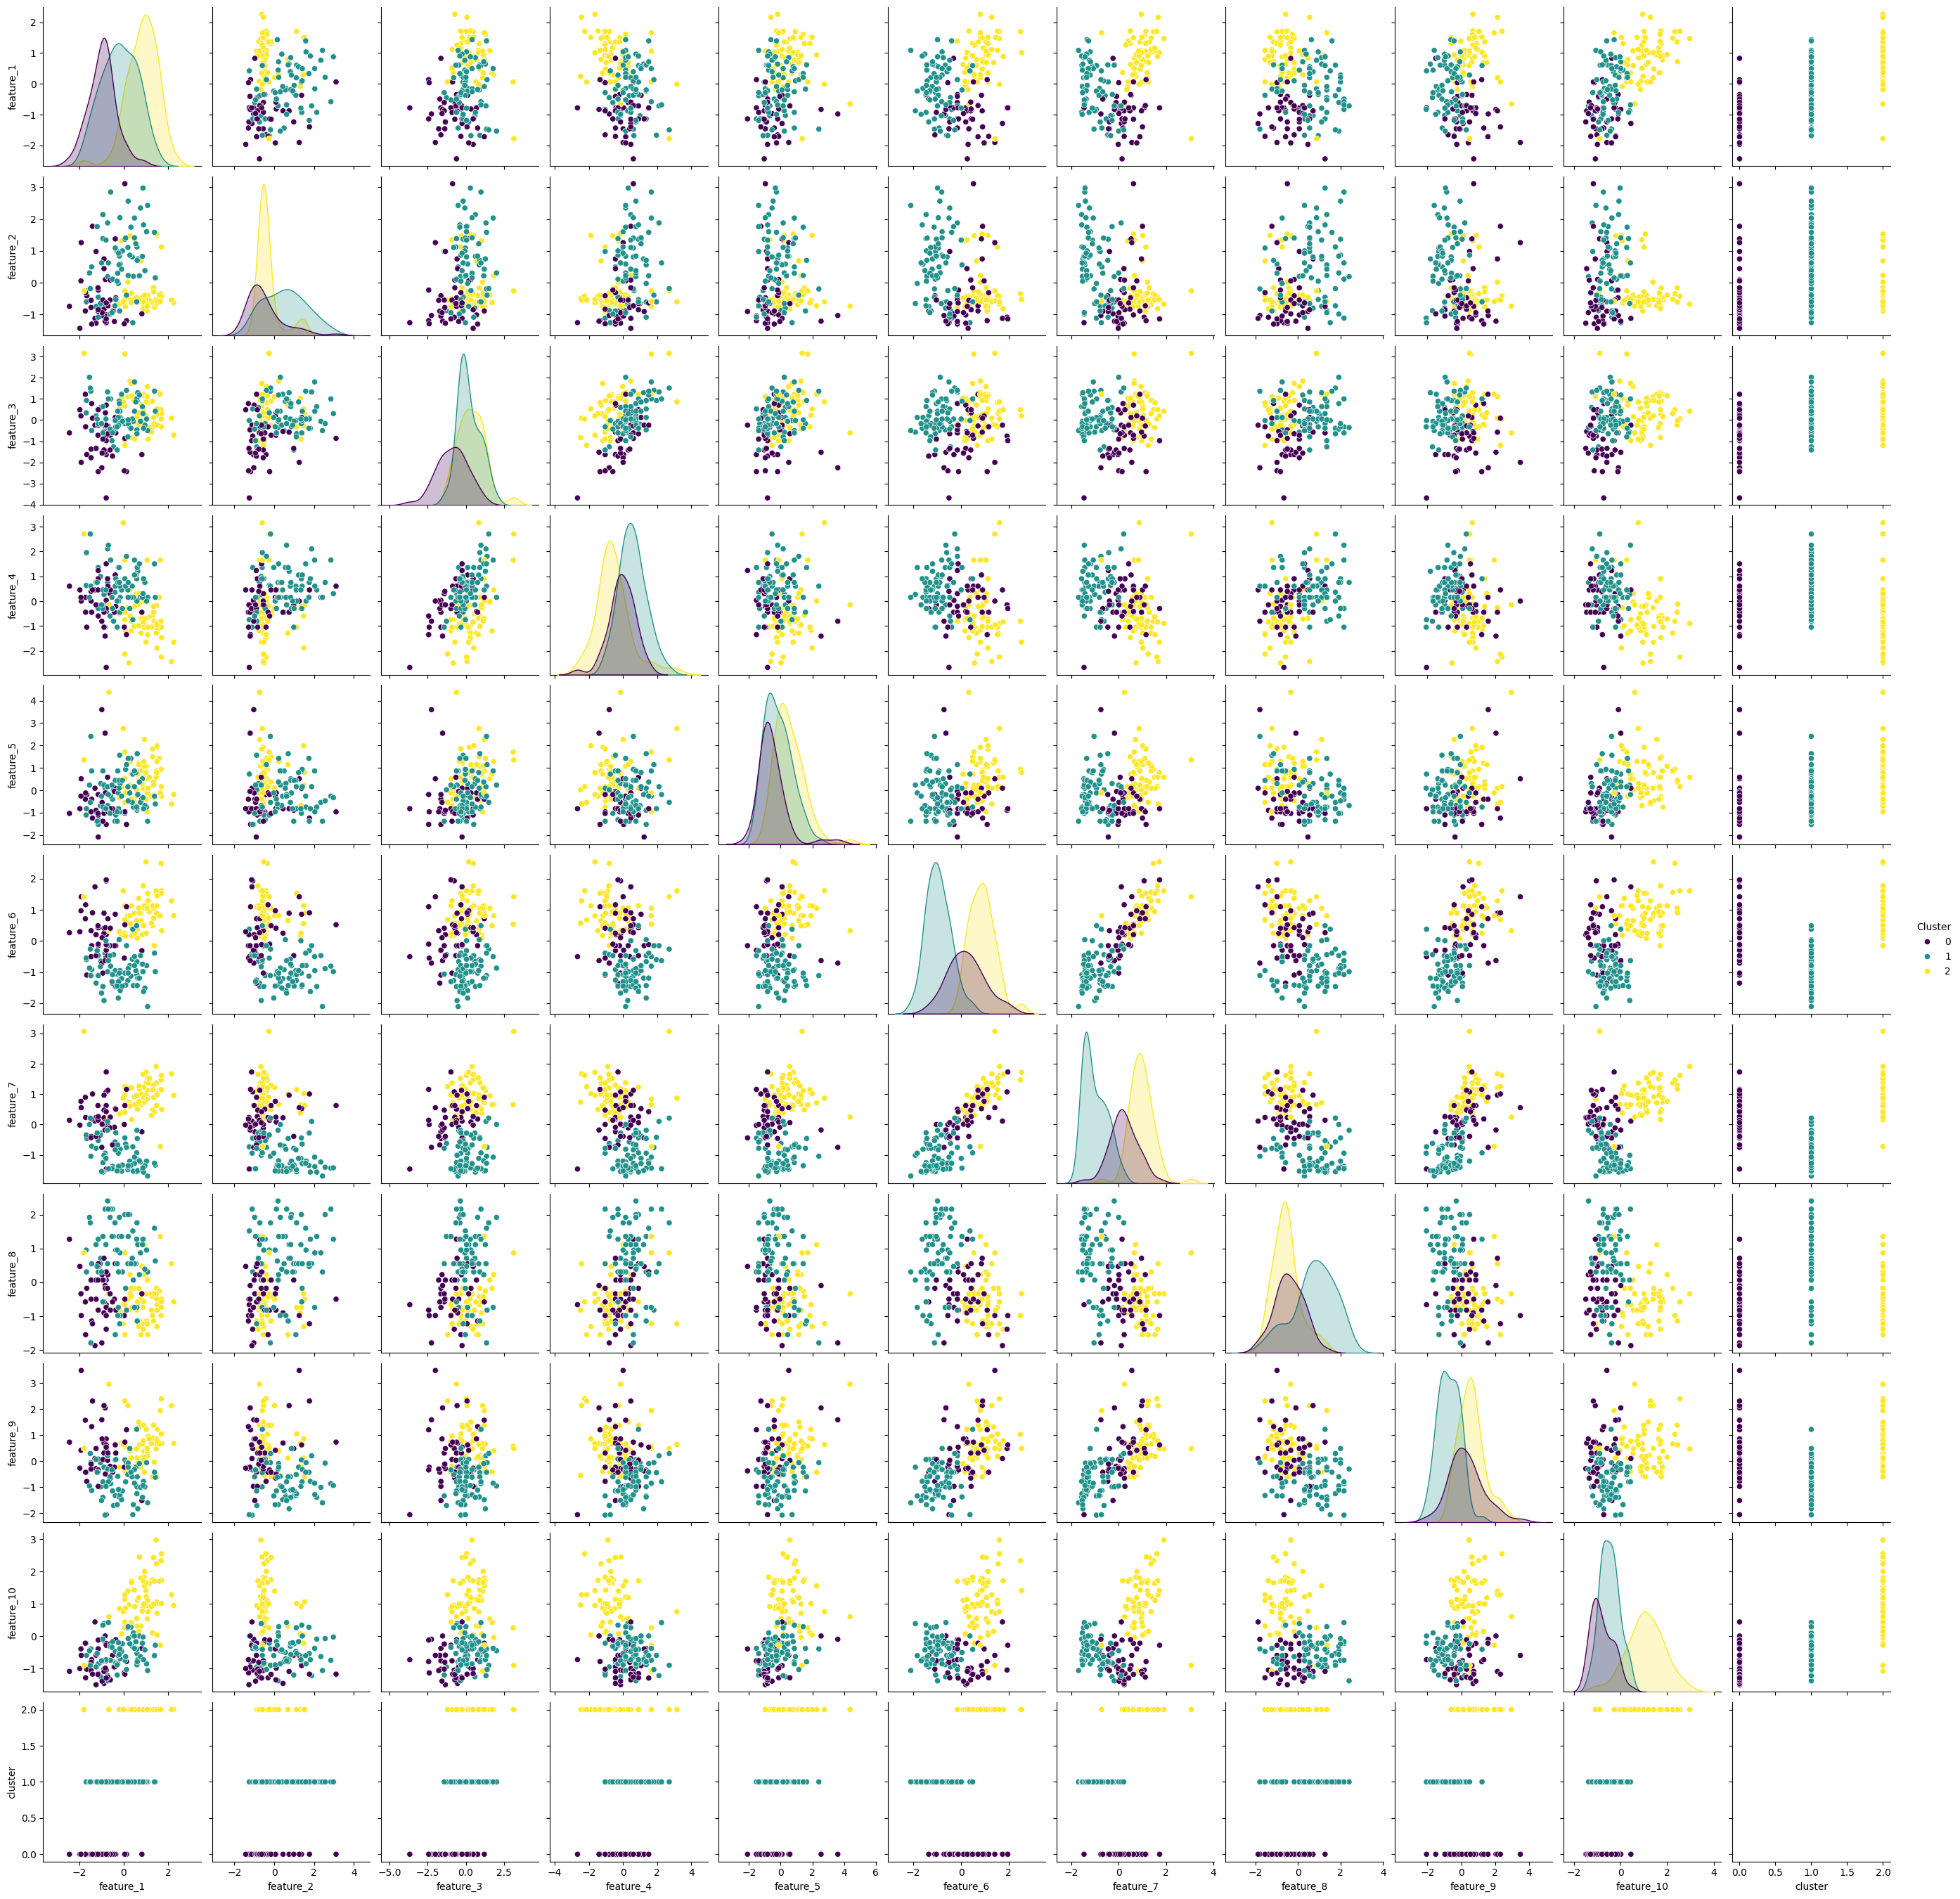

In [21]:
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans

X = df.copy()

kmeans = KMeans(n_clusters=3, random_state=0)
X['Cluster'] = kmeans.fit_predict(X)
sns.pairplot(X, hue='Cluster', palette='viridis')
